# Dataset Exercise (March, 2023)

**Problem Description** <br>
You are given two data sets, X.csv and Y.csv. <br>
**Objective** <br>
Your task is to build a model to forecast the vector Y using the variables in X. You can assume that the conditional expectation of Y given X is linear in X. 

**This notebook will go through the followings steps to achieve the project objective:**
1. Exploratory Data Analysis (EDA) and Data Cleaning.
2. Baseline Regression 
3. Make the Data Better
4. Regression again with Better Data
5. Try Other ML Models
6. Compare All Models and Conclusions

### <span style="color:blue">Step 1 Exploratory Data Analysis (EDA) and Data Cleaning</span>

In this section, we will import the required libraries and load the two given datasets into Python environment. Then we will take a look at these datasets and perform some exploratory analysis.

In [77]:
# Import required libraries
import pandas as pd
import numpy as np

# For plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('seaborn-poster')
sns.set_style('darkgrid')

from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Load the dataset X
X = pd.read_csv('X.csv')
X.head(10)

,Unnamed: 0,0,1,2,3,4
0,0,0.652814,-0.795411,0.939938,-1.416972,2.884459
1,1,-3.313870,2.300480,-1.262742,2.128255,1.748513
2,2,3.609352,-3.417029,0.529676,-8.943355,1.542994
3,3,0.977559,-4.377676,-1.250228,-1.055279,-0.071893
4,4,0.595619,6.729869,0.487150,4.534389,3.922560
5,5,1.212975,1.266142,0.292715,9.853853,1.345588
6,6,-2.398927,-5.787197,-1.204806,-16.211547,-1.877139
7,7,-3.128738,-4.280239,-0.348913,-2.270709,1.026389
8,8,2.200677,-0.222454,0.861988,10.275668,1.866634
9,9,-2.654315,-2.355375,-0.510255,-4.937004,-0.944635


In [79]:
X.tail()

,Unnamed: 0,0,1,2,3,4
9995,9995,-1.413871,-0.170938,0.097458,-7.469407,0.220794
9996,9996,0.888054,5.553659,0.871694,3.714396,4.409195
9997,9997,6.464679,-1.207394,0.678292,5.653160,0.873655
9998,9998,1.560601,-3.867850,-0.930802,4.126256,-1.394939
9999,9999,-1.797180,6.400336,0.094289,-3.271567,2.889519


In [80]:
# Check the shape of X
print(f'The shape of X is {X.shape}')

The shape of X is (10000, 6)


In [81]:
# Load the dataset Y
Y = pd.read_csv('Y.csv', header=None)
Y.head(10)

,0,1
0,0,7.411771
1,1,45.082121
2,2,-57.310678
3,3,-19.190323
4,4,-7.259200
5,5,-8.271333
6,6,45.212939
7,7,24.486158
8,8,-247.751118
9,9,-28.583342


In [82]:
Y.tail()

,0,1
9995,9995,-21.142806
9996,9996,-10.244619
9997,9997,-24.273814
9998,9998,-45.592810
9999,9999,-10.222768


In [83]:
# Check the shape of Y
print(f'The shape of Y is {Y.shape}')

The shape of Y is (10000, 2)


First, let's merge these two datasets togother for the convenience of manipulation. 

In [84]:
# Change the column names in Y 
Y.columns = ['Unnamed: 0', 'y']
Y.head()

,Unnamed: 0,y
0,0,7.411771
1,1,45.082121
2,2,-57.310678
3,3,-19.190323
4,4,-7.259200


In [85]:
# Inner join X and Y
XY = pd.merge(X, Y, how='inner', on='Unnamed: 0')
print(XY.shape)
XY.head()

(10000, 7)


,Unnamed: 0,0,1,2,3,4,y
0,0,0.652814,-0.795411,0.939938,-1.416972,2.884459,7.411771
1,1,-3.313870,2.300480,-1.262742,2.128255,1.748513,45.082121
2,2,3.609352,-3.417029,0.529676,-8.943355,1.542994,-57.310678
3,3,0.977559,-4.377676,-1.250228,-1.055279,-0.071893,-19.190323
4,4,0.595619,6.729869,0.487150,4.534389,3.922560,-7.259200


In [86]:
XY.tail()

,Unnamed: 0,0,1,2,3,4,y
9995,9995,-1.413871,-0.170938,0.097458,-7.469407,0.220794,-21.142806
9996,9996,0.888054,5.553659,0.871694,3.714396,4.409195,-10.244619
9997,9997,6.464679,-1.207394,0.678292,5.653160,0.873655,-24.273814
9998,9998,1.560601,-3.867850,-0.930802,4.126256,-1.394939,-45.592810
9999,9999,-1.797180,6.400336,0.094289,-3.271567,2.889519,-10.222768


Let's drop the first column `Unnamed: 0` since it's not useful anymore.

In [87]:
XY.drop('Unnamed: 0', axis=1, inplace=True)
XY.head()

,0,1,2,3,4,y
0,0.652814,-0.795411,0.939938,-1.416972,2.884459,7.411771
1,-3.313870,2.300480,-1.262742,2.128255,1.748513,45.082121
2,3.609352,-3.417029,0.529676,-8.943355,1.542994,-57.310678
3,0.977559,-4.377676,-1.250228,-1.055279,-0.071893,-19.190323
4,0.595619,6.729869,0.487150,4.534389,3.922560,-7.259200


Check whether the column `y` has `NaN` values.

In [88]:
XY['y'].isnull().value_counts()

False    10000
Name: y, dtype: int64

The column `y` has no `NaN` values.

<span style="color:maroon">**Train-test Split**</span> <br>
Before doing any imputation on the numerical columns, we should first split the dataset into training set and test set to avoid bias. This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

In particular, we will use 85% of the dataset for training and 15% for testing. In addition, the random state is set to 66 to make sure we have repeatable results.

In [89]:
model_features = ['0', '1', '2', '3', '4']
model_target = ['y']

X_train, X_test, y_train_base, y_test_base = train_test_split(XY[model_features], XY[model_target], test_size=0.15, random_state=66)

In [90]:
print(f'The shape of the training set is {X_train.shape}')
print(f'The shape of the test set is {X_test.shape}')

The shape of the training set is (8500, 5)
The shape of the test set is (1500, 5)


Now that we have our training and test sets, we can move on to perform imputation for the numerical columns. For missing values in X, we will perform imputation. <br>
It is important to get some statistics on the datasets to decide on whether to use mean/mode/median for the imputation. First, let's take a look at the summary statistics.

In [91]:
X_train.describe()

,0,1,2,3,4
count,8499.000000,8497.000000,8499.000000,8499.000000,8490.000000
mean,0.014452,-0.003336,0.115976,0.349098,1.019902
std,2.006311,5.451249,10.866764,64.793087,2.128536
min,-7.654205,-18.584603,-3.726699,-3001.334527,-7.265781
25%,-1.322155,-3.687500,-0.608870,-3.954563,-0.422465
50%,-0.002240,-0.024953,0.002650,0.017289,1.010872
75%,1.362595,3.661604,0.605904,4.111498,2.457544
max,6.766637,19.256933,998.329754,5134.656375,9.896021


<span style='color:green'>**Obeservations for imputating missing values**</span>

From the summary statistics, we know that there are `1` `NaN` values in the `0` column, `3` `NaN` values in the `1` column, `1` `NaN` values in the `2` column, `1` `NaN` values in the `3` column, and `10` `NaN` values in the `4` column.

1. For the `3` columns, since the values are highly spread out based on its `std`, we use `medium` for imputation, which is more robust to outliers.
2. For the `0`, `1`, `2` and `4` columns, we use `mean` for imputation.

In [93]:
X_train['3'].median()

0.0172891224684066

In [94]:
X_train['3'].fillna(X_train['3'].median(), inplace=True)

In [95]:
X_train['0'].fillna(X_train['0'].mean(), inplace=True)
X_train['1'].fillna(X_train['1'].mean(), inplace=True)
X_train['2'].fillna(X_train['2'].mean(), inplace=True)
X_train['4'].fillna(X_train['4'].mean(), inplace=True)

In [96]:
# Check whether the imputation for missing values are performed properly or not
X_train.describe()

,0,1,2,3,4
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,0.014452,-0.003336,0.115976,0.349059,1.019902
std,2.006193,5.450287,10.866124,64.789276,2.127284
min,-7.654205,-18.584603,-3.726699,-3001.334527,-7.265781
25%,-1.322047,-3.685044,-0.608815,-3.954532,-0.420617
50%,-0.001336,-0.024782,0.002765,0.017289,1.017282
75%,1.362245,3.661271,0.605875,4.110616,2.453773
max,6.766637,19.256933,998.329754,5134.656375,9.896021


Nice! All missing values are imputed. Next, let's move on to X_test.

In [97]:
X_test.describe()

,0,1,2,3,4
count,1499.000000,1500.000000,1500.000000,1500.000000,1499.000000
mean,6.719020,0.349901,0.047225,0.267323,1.152044
std,258.333939,5.506170,0.903409,6.186003,2.136258
min,-6.984680,-19.706080,-3.152410,-20.445539,-6.053405
25%,-1.211750,-3.187600,-0.536569,-3.528277,-0.229897
50%,0.075218,0.472674,0.034826,0.250230,1.147594
75%,1.343761,4.006087,0.643433,4.332332,2.599443
max,10001.660383,16.731289,3.761865,18.625924,8.653041


Based on the summary statistics, we will impute the `0`, `1`, `3` columns based their medians since values in these three columns are more spread out, and impute the `2` and `4` based on their means.

In [98]:
X_test['0'].fillna(X_test['0'].median(), inplace=True)
X_test['1'].fillna(X_test['1'].median(), inplace=True)
X_test['3'].fillna(X_test['3'].median(), inplace=True)

X_test['2'].fillna(X_test['2'].mean(), inplace=True)
X_test['4'].fillna(X_test['4'].mean(), inplace=True)

# Check whether the imputation for missing values are performed properly or not
X_test.describe()

,0,1,2,3,4
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.714590,0.349901,0.047225,0.267323,1.152044
std,258.247812,5.506170,0.903409,6.186003,2.135545
min,-6.984680,-19.706080,-3.152410,-20.445539,-6.053405
25%,-1.211214,-3.187600,-0.536569,-3.528277,-0.229313
50%,0.075218,0.472674,0.034826,0.250230,1.148462
75%,1.343176,4.006087,0.643433,4.332332,2.599242
max,10001.660383,16.731289,3.761865,18.625924,8.653041


It can be seen that all missing values are imputed.

### <span style="color:blue">Step 2 Baseline Regression</span>

Linear regression is one of the simplest yet powerful model. In this method, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the _bias_ term. 
For training a model, we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the RMSE. Therefore, to train a linear regression model, we need to find the values of parameters that minimize the RMSE. There are other metrics introduced as follows.

#### <span style="color:maroon">**Definitions of the evaluation metrics:** </span> 
* **Mean Absolute Error (MAE)**: the average of the absolute error values. The units of the error score match the units of the target value that is being predicted.
* **Mean Squared Error (MSE)**: average of the squared differences between predicted and expected target values in a dataset
* **Root Mean Squared Error (RMSE)**: square root of the MSE. The units of the RMSE are the same as the original units of the target value that is being predicted. 
* **R-squared (coefficient of determination)**: Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0. _**If the relationship between the independent and dependent variables is non-linear then we will have low R2 values despite the model being good.**_

In [99]:
# Importing the required packages for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train_base)

LinearRegression()

In [101]:
y_pred_baselr_test = linear_regressor.predict(X_test)
print('MAE on test set (Base LR):', mean_absolute_error(y_test_base, y_pred_baselr_test))
print('MSE on test set (Base LR):', mean_squared_error(y_test_base, y_pred_baselr_test))
print('RMSE on test set (Base LR):', np.sqrt(mean_squared_error(y_test_base, y_pred_baselr_test)))
print('R2 score on test set (Base LR):', r2_score(y_test_base, y_pred_baselr_test))

MAE on test set (Base LR): 37.24472457785852
MSE on test set (Base LR): 15957.2773389628
RMSE on test set (Base LR): 126.32211737840211
R2 score on test set (Base LR): -3.7894442619213944


In [102]:
# Applying the model to the train data to see what errors we get - check if it is overfitting 
y_pred_baselr_train = linear_regressor.predict(X_train)
print('MAE on training set (Base LR):', mean_absolute_error(y_train_base, y_pred_baselr_train))
print('MSE on training set (Base LR):', mean_squared_error(y_train_base, y_pred_baselr_train))
print('RMSE on training set (Base LR):', np.sqrt(mean_squared_error(y_train_base, y_pred_baselr_train)))
print('R2 score on training set (Base LR):', r2_score(y_train_base, y_pred_baselr_train))

MAE on training set (Base LR): 32.69033820253523
MSE on training set (Base LR): 2915.323168071867
RMSE on training set (Base LR): 53.993732674004555
R2 score on training set (Base LR): 0.006680469787278875


**Some observations from this basic linear regression model**
1. For the model on both the training and test datasets, the model performance is bad in terms of all these four metrics. The R2 score is even negative for the test dataset.
2. The model overfit the training data a lot based on all the four metrics, especially in terms of MSE on test dataset, since they are higher for test dataset than those for training dataset. 

This implies that the input data we use to train the linear regression model has low quality and need to be enhanced. Based on our previous discussions, this may be because of possible outliers. Next, let's handle outliers to make the data better. 

### <span style="color:blue">Step 3 Make the Data Better</span>

What we are going to perform in this section includes:
1. Outlier Detection and Removal
2. Imputation for Missing Values
3. Train-test Split
4. Feature Scaling


<span style="color:maroon">**Outlier Detection and Removal**</span> <br>
First, let's take a look at the summary statistics of XY.

In [103]:
XY.describe()

,0,1,2,3,4,y
count,9998.000000,9997.000000,9999.000000,9999.000000,9989.000000,10000.000000
mean,1.019668,0.049666,0.105662,0.336831,1.039732,1.183616
std,100.046328,5.460705,10.024619,59.783231,2.130112,54.743893
min,-7.654205,-19.706080,-3.726699,-3001.334527,-7.265781,-712.340073
25%,-1.303399,-3.634017,-0.597181,-3.908743,-0.403526,-17.473542
50%,0.012223,0.047400,0.008015,0.050861,1.031119,1.943772
75%,1.359710,3.699935,0.613412,4.135978,2.475406,21.275091
max,10001.660383,19.256933,998.329754,5134.656375,9.896021,681.761316


<span style='color:green'>**Some insights**</span>: <br>
For X: <br>
1. The `0` column has the largest `std` followed by the `3` column. This may be because there are some outliers in these two columns.
2. The `0` column has a minimum of `-7.654205` and a maximum of `10001.660383` with a mean of `1.019668`. The `3` column has a minimum of `-3001.334527` and a maximum of `5134.656375` with a mean of `0.336831`. The values in these two columns are highly spread out. 

For Y: <br>
1. There is no `NaN` value in Y.
2. The dataset `Y.csv` has a minimum of `-712.340073` and a maximum of `681.761316`.
3. The `std` of Y is `54.743893`, which is kind of large compared to its mean `1.183616`, and thus the values of Y is spread out and may have outliers.

<span style="color:green">**Ideas for handling outliers**</span> <br>
1. For normally distributed data, if datapoints lie away from the range $[\mu-3\sigma, \mu+3\sigma]$, they are considered as `outliers`.
2. For skewed distributed data, we will utilize the **Interquartile Range Method (IQR)**. The IQR is calculated as the difference between the 75th and the 25th percentiles of the data, i.e., $IQR=Q3-Q1$, where $Q3$ represents $75\text{percentile}$ and $Q1$ represents $25\text{percentile}$. If datapoints do not lie in between the range: $[Q1-(1.5*IQR),~ Q3+(1.5*IQR)]$, then the datapoint is considered as outliers. 

Let's plot and observe these data points first.

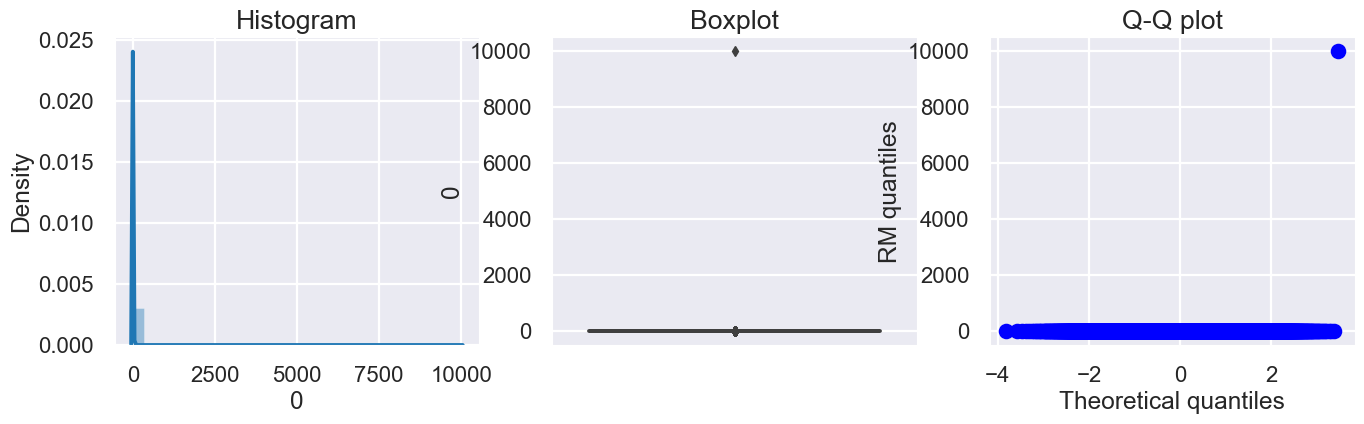

In [104]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['0'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['0']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['0'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.title('Q-Q plot');

As we can see from above figures, the datapoints in the `0` column is very skewed from normal distributions, and most datapoints lie on the left side. Both boxplot and Q-Q plot imply that outliers exist.

Next, we will compute the boundary of minimum and maximum values out of which data would be considered as outliers.

In [105]:
# Compute upper and lower boundary limit
def non_normal_outliers(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + (1.5 * IQR)
    lower_limit = df[col].quantile(0.25) - (1.5 * IQR)
    return (lower_limit, upper_limit)

In [106]:
lower_limit, upper_limit = non_normal_outliers(XY, '0')
print(f'lower limit of `0` column is {lower_limit},  upper limit is {upper_limit}')

lower limit of `0` column is -5.298061272269601,  upper limit is 5.35437214520921


Now remove outliers in the `0` column based on the computed lower and upper limits.

In [107]:
print(f'The shape of original XY dataframe is {XY.shape}')

# filter values lie above upper limit and below lower limit
XY = XY.loc[(XY['0'] <= upper_limit) & (XY['0'] >= lower_limit)]

print(f'The shape of XY dataframe after removing outliers in `0` column is {XY.shape}')

The shape of original XY dataframe is (10000, 6)
The shape of XY dataframe after removing outliers in `0` column is (9922, 6)


Let's plot the datapoints in the `0` column again to check the effect.

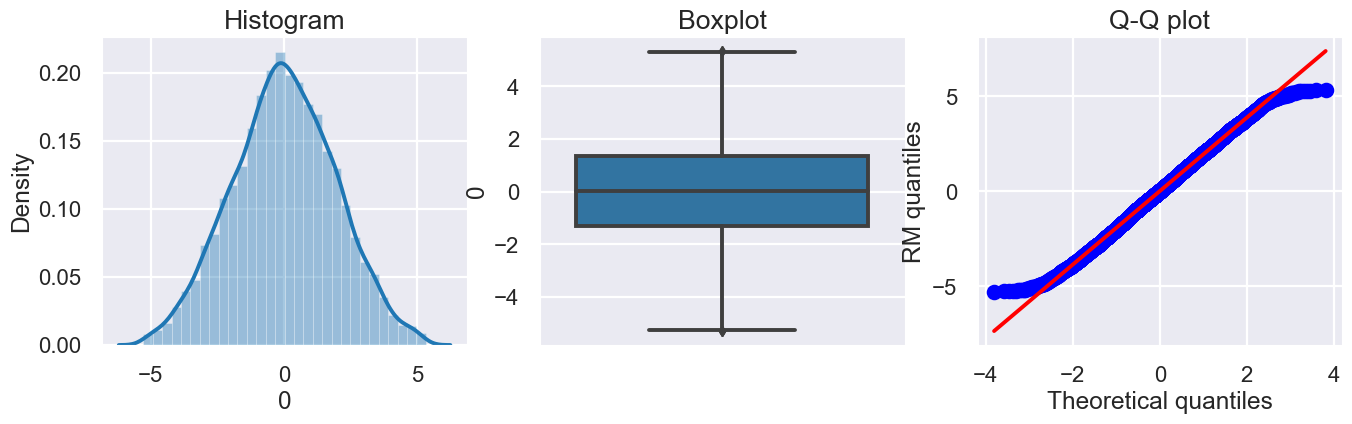

In [108]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['0'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['0']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['0'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.title('Q-Q plot');

As we see from above figures, the datapoints in the `0` column have better statistical distribution now. 

Let's move to the next column `1`.

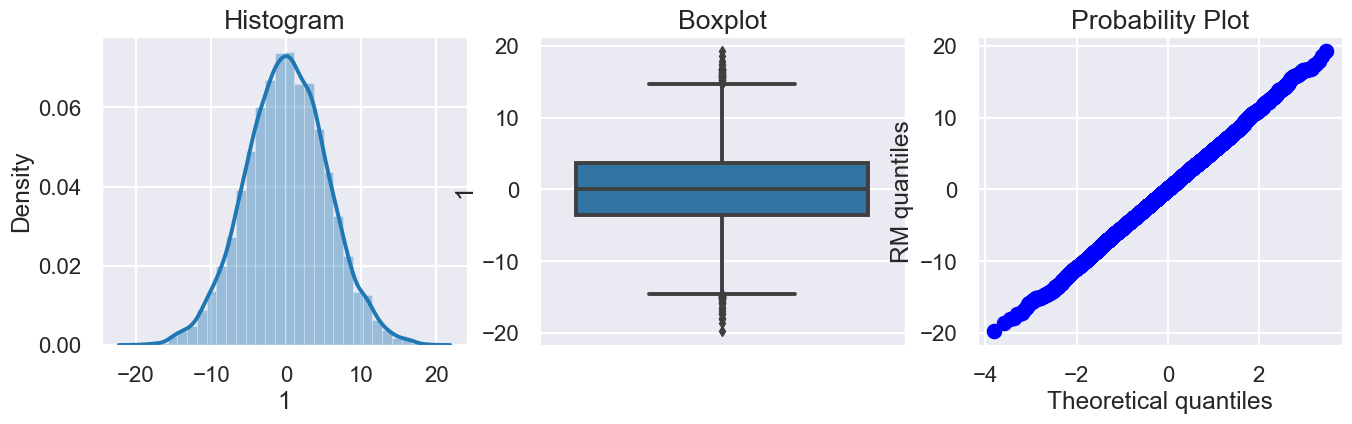

In [110]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['1'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['1']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['1'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles');

As we can see from above figures, distribution plot explains that the data in the `1` column is normally distributed. Box plot and Q-Q plot do not show outliers.

Let's move to the next column `2`.

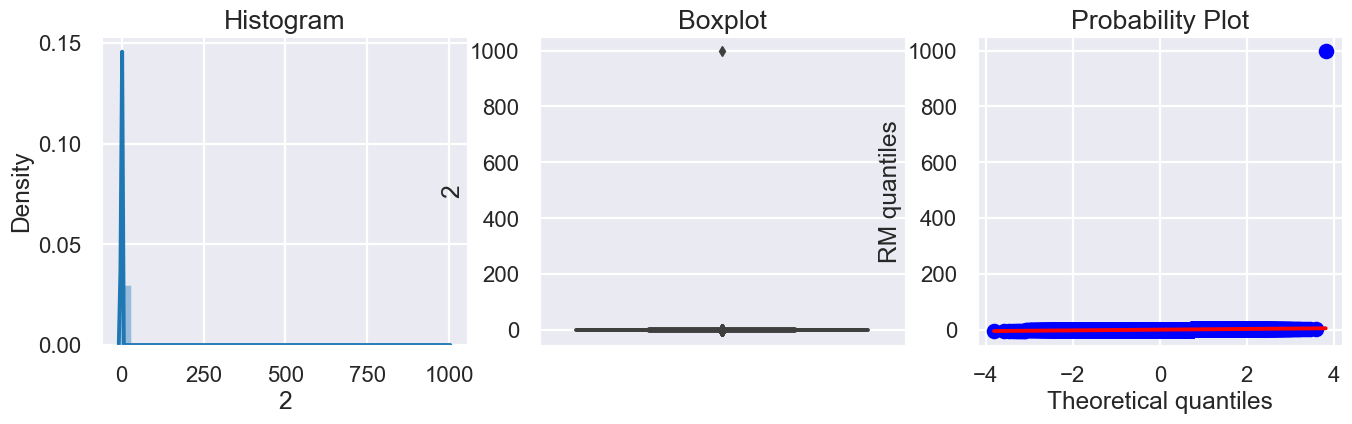

In [111]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['2'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['2']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['2'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles');

As we can see from above figures, the datapoints in the `2` column is very skewed from normal distributions, and most datapoints lie on the left side. Both boxplot and Q-Q plot imply that outliers exist.

Next, we will compute the boundary of minimum and maximum values out of which data would be considered as outliers.

In [112]:
lower_limit, upper_limit = non_normal_outliers(XY, '2')
print(f'lower limit of `2` column is {lower_limit},  upper limit is {upper_limit}')

lower limit of `2` column is -2.404713491085079,  upper limit is 2.419650109334504


Now remove outliers in the `2` column based on the computed lower and upper limits.

In [113]:
print(f'The shape of XY dataframe is {XY.shape}')

# filter values lie above upper limit and below lower limit
XY = XY.loc[(XY['2'] <= upper_limit) & (XY['2'] >= lower_limit)]

print(f'The shape of XY dataframe after removing outliers in `2` column is {XY.shape}')

The shape of XY dataframe is (9922, 6)
The shape of XY dataframe after removing outliers in `2` column is (9846, 6)


Let's plot the datapoints in the `2` column again to check the effect.

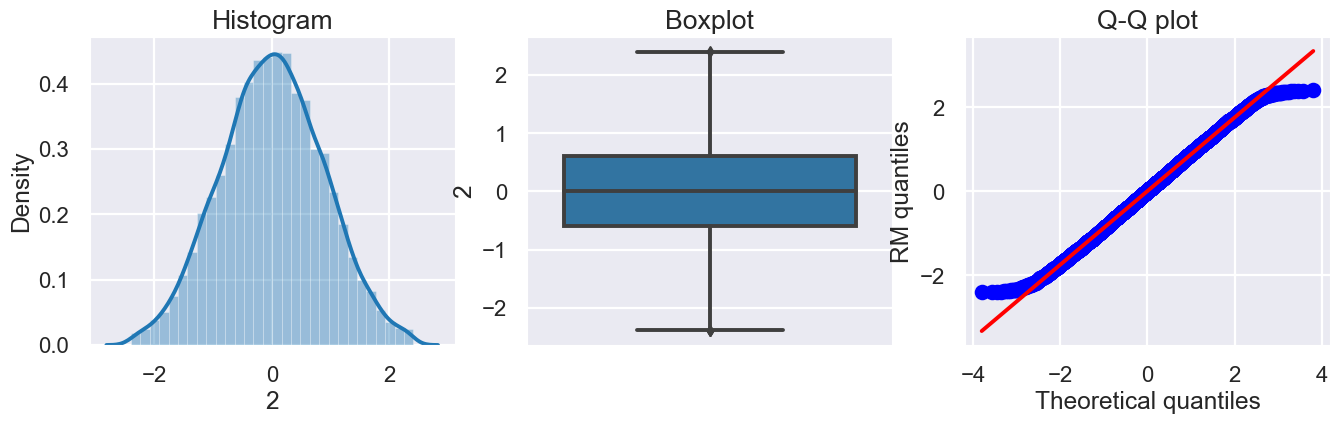

In [114]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['2'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['2']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['2'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.title('Q-Q plot');

As we see from above figures, the datapoints in the `2` column have better statistical distribution now. 

Let's move to the next column `3`.

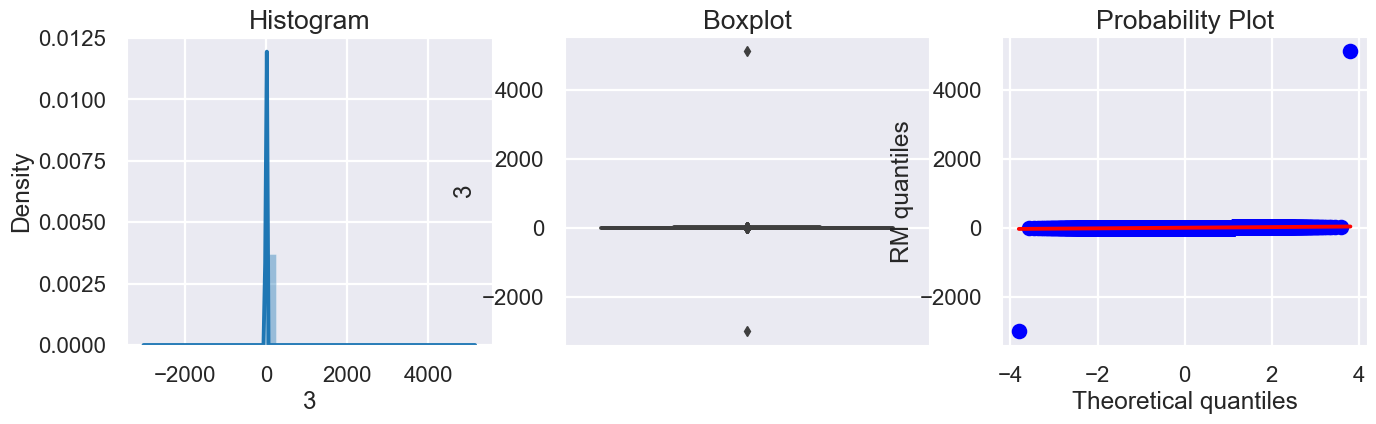

In [116]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['3'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['3']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['3'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles');

Figures above show outliers. Let's compute the lower and upper limits. Based on the limits, remove outliers for the `3` column.

lower limit of `3` column is -15.927440065609167,  upper limit is 16.15308568401165
The shape of XY dataframe is (9846, 6)
The shape of XY dataframe after removing outliers in `3` column is (9772, 6)


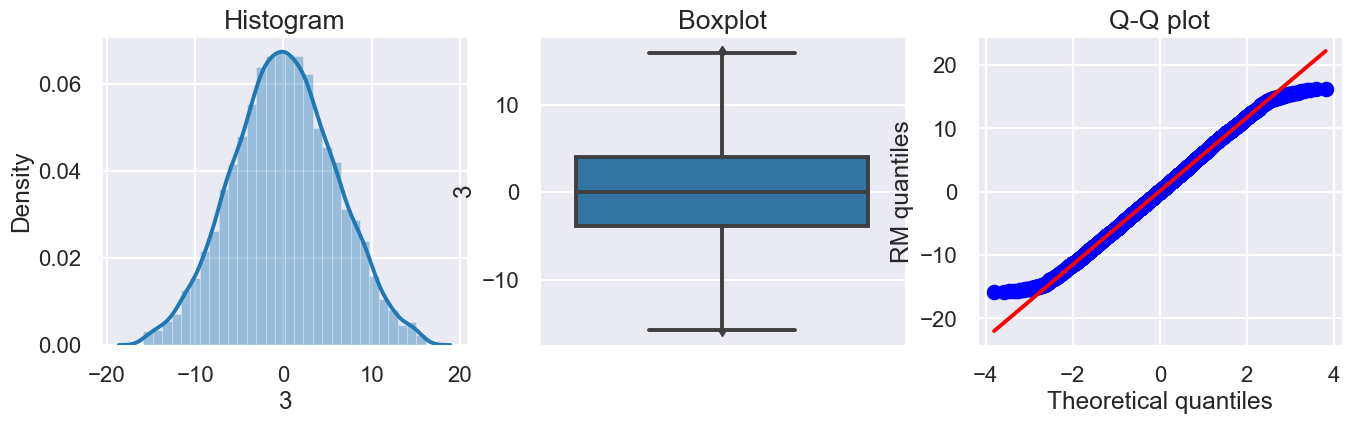

In [117]:
lower_limit, upper_limit = non_normal_outliers(XY, '3')
print(f'lower limit of `3` column is {lower_limit},  upper limit is {upper_limit}')

print(f'The shape of XY dataframe is {XY.shape}')

# filter values lie above upper limit and below lower limit
XY = XY.loc[(XY['3'] <= upper_limit) & (XY['3'] >= lower_limit)]

print(f'The shape of XY dataframe after removing outliers in `3` column is {XY.shape}')

# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['3'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['3']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['3'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.title('Q-Q plot');

As we can see from above figures, the datapoints in the `3` column have better statistical distribution now. 

Let's move to the next column `4`.

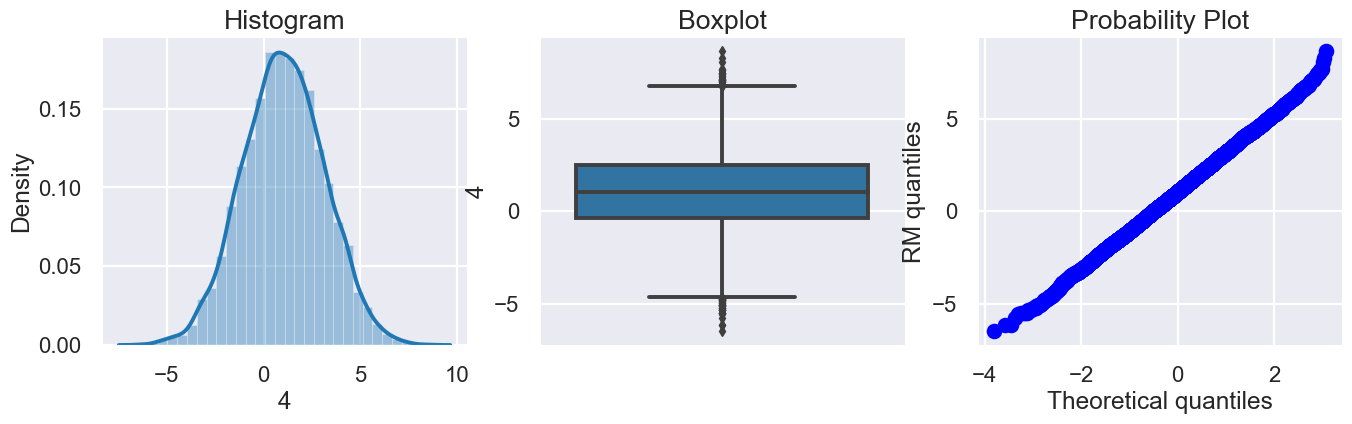

In [119]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['4'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['4']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['4'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles');

As we see from above figures, distribution plot explains that the data in the `4` column is normally distributed. Box plot and Q-Q plot do not show outliers.

Let's move to the next column `y`.

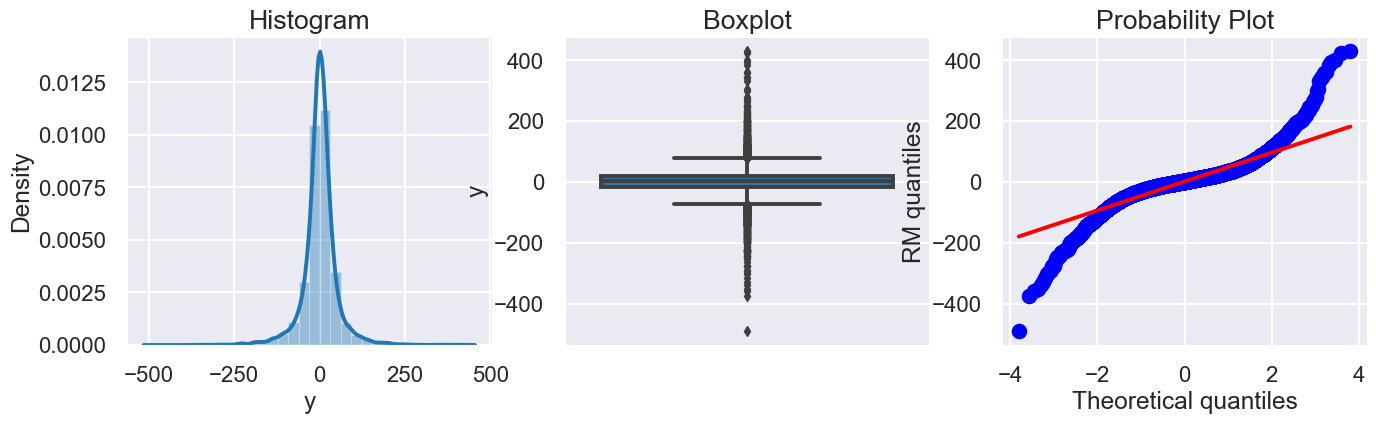

In [121]:
# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['y'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['y']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['y'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles');

Figures above show outliers. Let's compute the lower and upper limits. Based on the limits, remove outliers for the `y` column.

lower limit of `y` column is -73.95834298052942,  upper limit is 77.94200672193648
The shape of XY dataframe is (9772, 6)
The shape of XY dataframe after removing outliers in `y` column is (8815, 6)


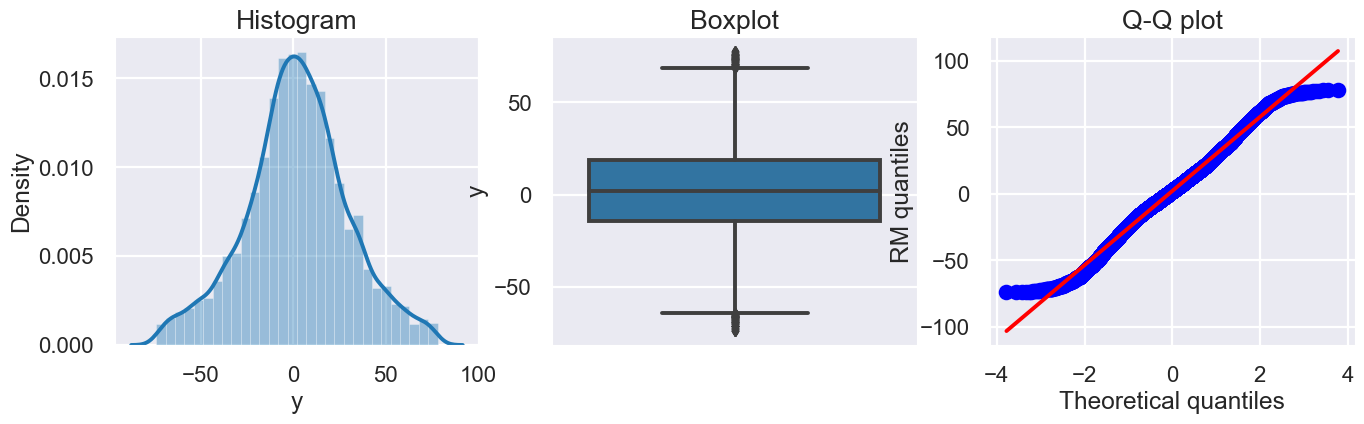

In [123]:
lower_limit, upper_limit = non_normal_outliers(XY, 'y')
print(f'lower limit of `y` column is {lower_limit},  upper limit is {upper_limit}')

print(f'The shape of XY dataframe is {XY.shape}')

# filter values lie above upper limit and below lower limit
XY = XY.loc[(XY['y'] <= upper_limit) & (XY['y'] >= lower_limit)]

print(f'The shape of XY dataframe after removing outliers in `y` column is {XY.shape}')

# Plotting and observing whether dataset has outliers or not
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 3, 1) # multiple plottig and 1st position of fig
sns.distplot(XY['y'], bins=30) # checking if data normally distributed
plt.title('Histogram') 
plt.subplot(1, 3, 2)  # plotting 2nd position of figure
sns.boxplot(y=XY['y']) # boxplot
plt.title('Boxplot')
plt.subplot(1, 3, 3) # plotting 3rd position of figure
stats.probplot(XY['y'], dist="norm", plot=plt) # q-q plot to check how our data is distributed in reference with normal distribution
plt.ylabel('RM quantiles')
plt.title('Q-Q plot');

After obtaining better quality data, let's retrain the linear regression model to see whether the model performance is improved or not. Before that, we need to split the dataset as training and test datasets.

<span style="color:maroon">**Train-test Split**</span> <br>
we will use 85% of the dataset for training and 15% for testing. In addition, the random state is set to 66 to make sure we have repeatable results.

In [208]:
model_features = ['0', '1', '2', '3', '4']
model_target = ['y']

X_train, X_test, y_train, y_test = train_test_split(XY[model_features], XY[model_target], test_size=0.15, random_state=66)

In [209]:
print(f'The shape of the training set is {X_train.shape}')
print(f'The shape of the test set is {X_test.shape}')

The shape of the training set is (7492, 5)
The shape of the test set is (1323, 5)


<span style="color:maroon">**Imputation for Missing Values**</span> <br>
Now that we have our training and test sets, we can move on to perform imputation for the numerical columns. For missing values in X, we will perform imputation.

It is important to get some statistics on the datasets to decide on whether to use mean/mode/median for the imputation. First, let's take a look at the summary statistics.

In [210]:
X_train.describe()

,0,1,2,3,4
count,7492.000000,7492.000000,7492.000000,7492.000000,7484.000000
mean,0.011415,0.006024,0.009511,0.008026,1.024121
std,1.897418,5.394354,0.870434,5.101106,2.100079
min,-5.284308,-19.706080,-2.396012,-15.473491,-6.478538
25%,-1.269962,-3.644961,-0.584179,-3.546469,-0.410970
50%,0.009439,0.027914,0.013086,-0.039525,1.002039
75%,1.321111,3.603322,0.609019,3.539444,2.449457
max,5.334429,19.256933,2.412581,15.957508,8.653041


<span style='color:green'>**Some insights**</span>: <br>
For X_train: <br>
note that after removing outliers, the `std` for all 5 columns has better statistical characteristics. So we will use `mean` for imputation on the training dataset.

In [211]:
X_train['0'].fillna(X_train['0'].mean(), inplace=True)
X_train['1'].fillna(X_train['1'].mean(), inplace=True)
X_train['2'].fillna(X_train['2'].mean(), inplace=True)
X_train['3'].fillna(X_train['3'].mean(), inplace=True)
X_train['4'].fillna(X_train['4'].mean(), inplace=True)

In [212]:
# Check whether the imputation for missing values are performed properly or not
X_train.describe()

,0,1,2,3,4
count,7492.000000,7492.000000,7492.000000,7492.000000,7492.000000
mean,0.011415,0.006024,0.009511,0.008026,1.024121
std,1.897418,5.394354,0.870434,5.101106,2.098958
min,-5.284308,-19.706080,-2.396012,-15.473491,-6.478538
25%,-1.269962,-3.644961,-0.584179,-3.546469,-0.409785
50%,0.009439,0.027914,0.013086,-0.039525,1.006703
75%,1.321111,3.603322,0.609019,3.539444,2.448599
max,5.334429,19.256933,2.412581,15.957508,8.653041


Nice! All missing values are imputated. Let's perform imputation for X_test dataset next.

In [213]:
# Check the summary statistics first
X_test.describe()

,0,1,2,3,4
count,1323.000000,1322.000000,1323.000000,1323.000000,1322.000000
mean,-0.017102,-0.045596,-0.032857,-0.116088,0.987012
std,1.938037,5.370567,0.865821,5.048818,2.056819
min,-5.266630,-15.106130,-2.400254,-15.882872,-5.531037
25%,-1.317222,-3.564675,-0.610839,-3.363999,-0.398893
50%,-0.069507,-0.092901,-0.029479,-0.075757,1.065354
75%,1.321053,3.715371,0.543590,3.102724,2.383706
max,5.285532,15.892216,2.327897,16.035557,7.455953


After removing outliers, X_test has better statistical characteristics. So we will use `mean` for imputation on the test dataset.

In [214]:
X_test['0'].fillna(X_test['0'].mean(), inplace=True)
X_test['1'].fillna(X_test['1'].mean(), inplace=True)
X_test['2'].fillna(X_test['2'].mean(), inplace=True)
X_test['3'].fillna(X_test['3'].mean(), inplace=True)
X_test['4'].fillna(X_test['4'].mean(), inplace=True)

# Check whether the imputation for missing values are performed properly or not
X_test.describe()

,0,1,2,3,4
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,-0.017102,-0.045596,-0.032857,-0.116088,0.987012
std,1.938037,5.368536,0.865821,5.048818,2.056041
min,-5.266630,-15.106130,-2.400254,-15.882872,-5.531037
25%,-1.317222,-3.554344,-0.610839,-3.363999,-0.397378
50%,-0.069507,-0.067091,-0.029479,-0.075757,1.062908
75%,1.321053,3.714747,0.543590,3.102724,2.383315
max,5.285532,15.892216,2.327897,16.035557,7.455953


Nice! All missing values are imputated.

Next, we will visualize the data points for a better understanding. Let's explore the distribution of Y using a histogram.

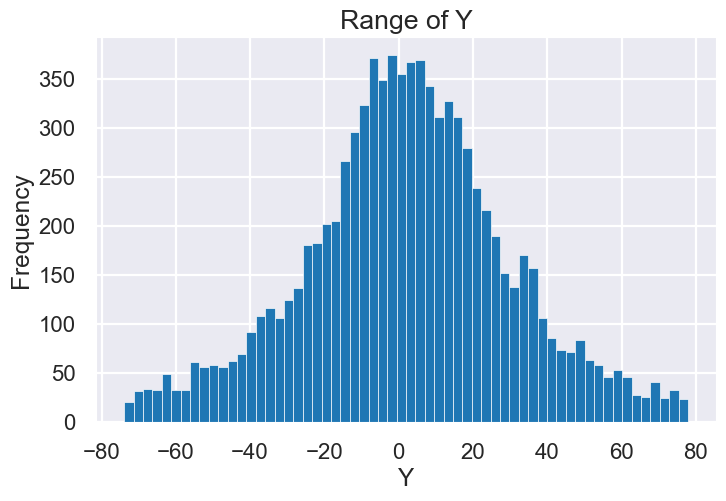

In [215]:
plt.figure(figsize=(8, 5))
plt.hist(XY['y'], bins=60)
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Range of Y');

It shows that most Y values are in the range of [-80, 80], and close to a normal distribution.

Let's visualize X and Y to see if there is any relationship between independent variables (i.e., X) and dependent variable Y (i.e., Y).

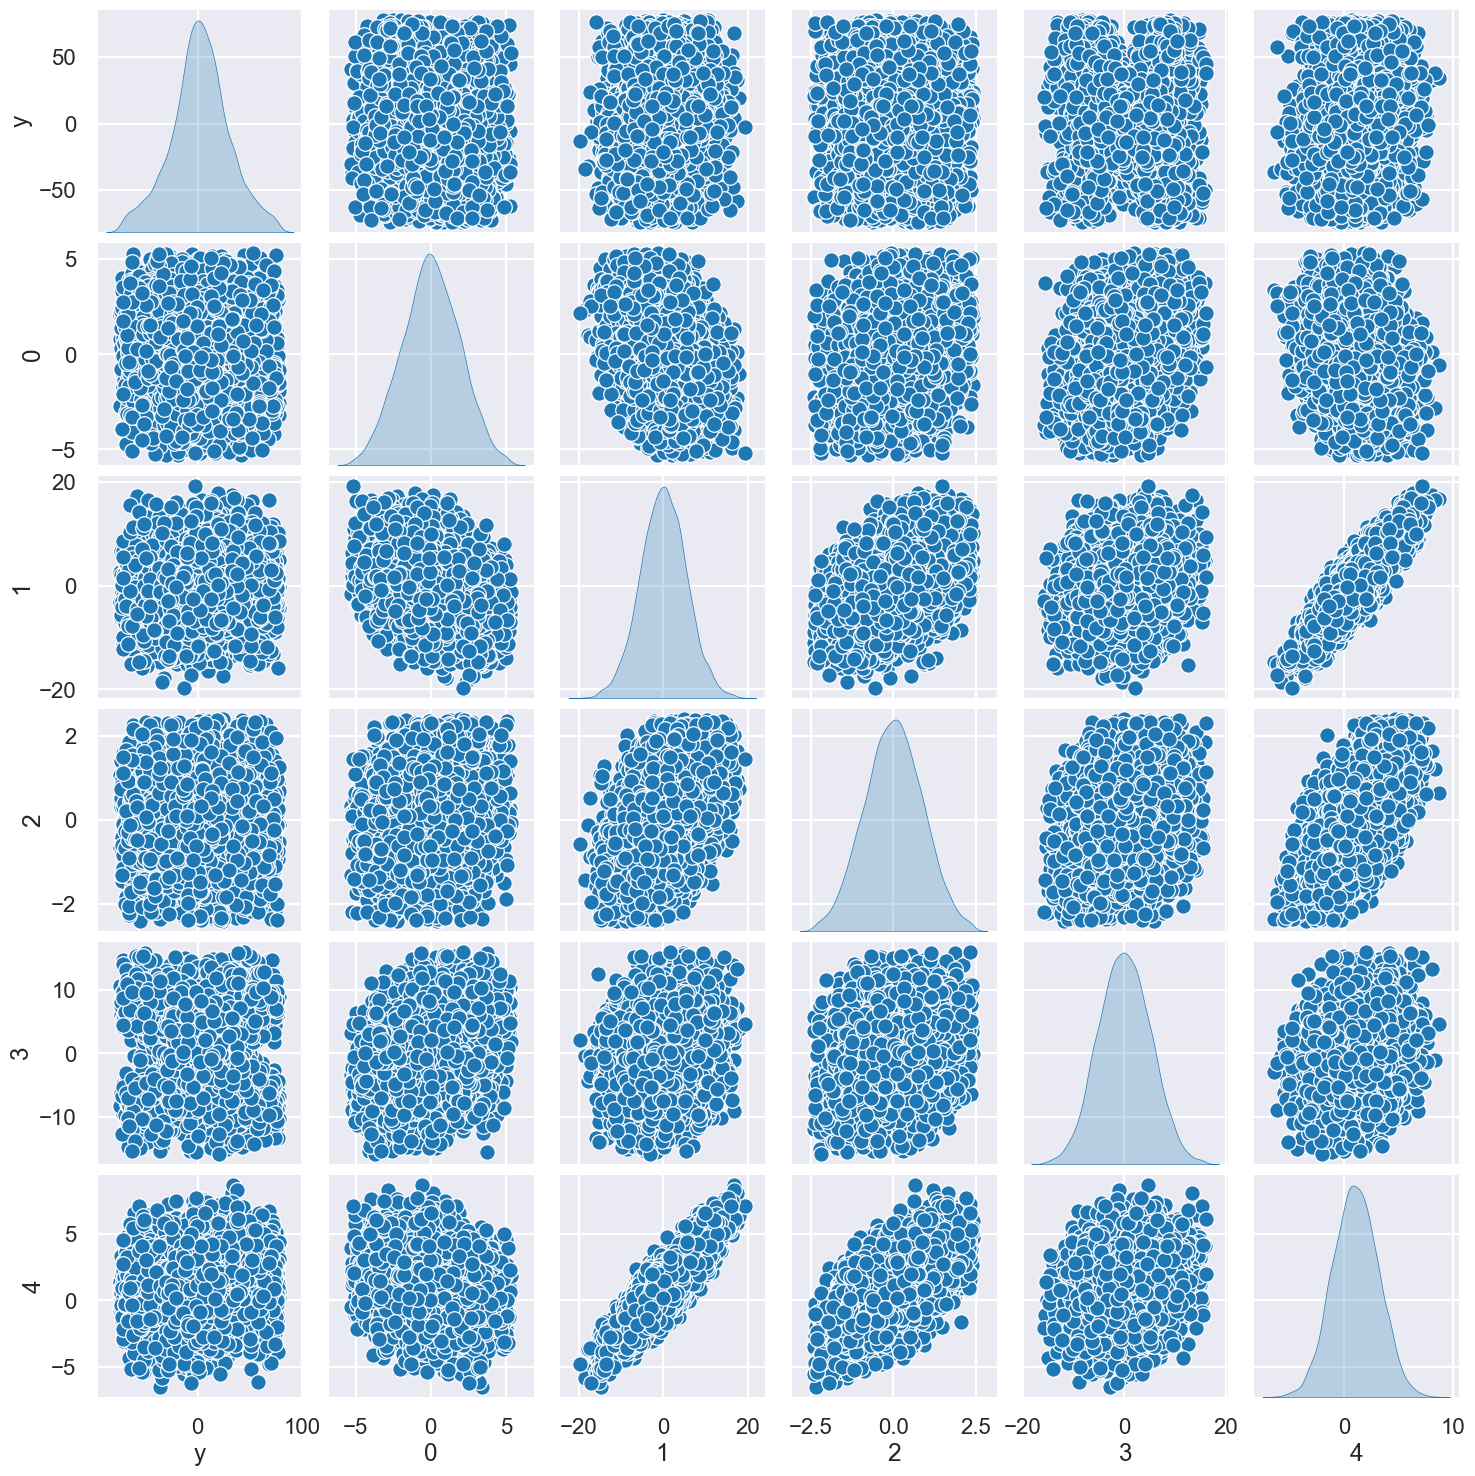

In [216]:
sns.pairplot(XY[['y', '0', '1', '2', '3', '4']], diag_kind='kde');

Note that now the relationships among variables are more evenly spread out. As data in the `1` column increases, the data in the `4` column increases as well. 

#### <span style='color:maroon'>Feature Scaling (for numerical features)</span>

Many algorithms are sensitive to features being on different scales, like metric-based algorithms (KNN, K-Means) and gradient descent-based algorithms (regression, neural nets).
  - StrandardScaler: scaling values to be centered around mean 0 with a standard deviation of 1.
  - MinMaxScaler: scaling values so that the minimum value is 0 and maximum value is 1.

We will scale the numerical features for the training and test sets using StandardScaler feature offered by sklearn.

In [217]:
X_train[['0', '1', '2', '3', '4']] = StandardScaler().fit_transform(X_train[['0', '1', '2', '3', '4']])
X_test[['0', '1', '2', '3', '4']] = StandardScaler().fit_transform(X_test[['0', '1', '2', '3', '4']])

Now that we have better quality training and test datasets. Let's move on to improve the linear regression model and try other ML models as well.

### <span style="color:blue">Step 4 Regression Again with Better Data</span>

In [218]:
linear_regressor_better = LinearRegression()
linear_regressor_better.fit(X_train, y_train)

LinearRegression()

In [219]:
y_pred_betterlr_test = linear_regressor_better.predict(X_test)
print('MAE on test set (Better LR):', mean_absolute_error(y_test, y_pred_betterlr_test))
print('MSE on test set (Better LR):', mean_squared_error(y_test, y_pred_betterlr_test))
print('RMSE on test set (Better LR):', np.sqrt(mean_squared_error(y_test, y_pred_betterlr_test)))
print('R2 score on test set (Better LR):', r2_score(y_test, y_pred_betterlr_test))

MAE on test set (Better LR): 20.369169375972604
MSE on test set (Better LR): 728.7603194275367
RMSE on test set (Better LR): 26.995561105995495
R2 score on test set (Better LR): 0.03663196755180842


In [220]:
# Applying the model to the train data to see what errors we get - check if it is overfitting 
y_pred_betterlr_train = linear_regressor_better.predict(X_train)
print('MAE on training set (Better LR):', mean_absolute_error(y_train, y_pred_betterlr_train))
print('MSE on training set (Better LR):', mean_squared_error(y_train, y_pred_betterlr_train))
print('RMSE on training set (Better LR):', np.sqrt(mean_squared_error(y_train, y_pred_betterlr_train)))
print('R2 score on training set (Better LR):', r2_score(y_train, y_pred_betterlr_train))

MAE on training set (Better LR): 20.98236948303421
MSE on training set (Better LR): 747.6536921615755
RMSE on training set (Better LR): 27.34325679507793
R2 score on training set (Better LR): 0.0414775863057294


**Some observations:**
1. For the model on both the training and test datasets, the model performance has improved a lot, though there is still space for improvement.
2. The metrics Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 Score obtained after applying the trained Linear Regression model to the training and test set are similar. This implies that the linear regression model is not over-fitting the training set since the performance doesn't decline on the previously unseen test set. 

Now let's have a look at the different parameters (coefficient) obtained after training the model.

In [221]:
coeff_df_lr = pd.DataFrame(linear_regressor_better.coef_[0], X_test.columns, columns=['Coefficient'])
coeff_df_lr

,Coefficient
0,2.344710
1,4.463382
2,-0.890952
3,-4.385958
4,1.243550


According to the linear regression coefficients, the features `0`, `1`, and `4` are positively related to the prediction of Y while the features `2` and `3` are negatively related to Y.

In [222]:
linear_regressor.intercept_

array([2.08775981])

Now that we have looked at the different coefficients and the bias term, let's see some of the Actual Y vs Predicted Y.

In [223]:
y_pred_linear_regression = pd.DataFrame(y_pred_betterlr_test)
y_pred_linear_regression

,0
0,16.377129
1,1.781082
2,0.861090
3,1.039948
4,2.029103
...,...
1318,-1.012718
1319,8.058727
1320,0.869897
1321,-2.557610


In [224]:
y_test

,y
6515,28.597744
3926,-0.882244
4354,-38.089710
4557,-59.347969
7175,-29.615472
...,...
7406,-63.184848
3845,-1.034990
387,32.407381
8905,2.152024


In [225]:
y_test.tail(5)

,y
7406,-63.184848
3845,-1.034990
387,32.407381
8905,2.152024
1472,0.350339


In [226]:
pd.DataFrame(y_pred_betterlr_test).tail(5)

,0
1318,-1.012718
1319,8.058727
1320,0.869897
1321,-2.557610
1322,-2.430134


In [227]:
comparison_df_lr = y_test.copy()
comparison_df_lr['Predicted Y'] = y_pred_betterlr_test
comparison_df_lr.columns = ['Actual Y', 'Predicted Y']

comparison_df_lr.sample(n=5) # sample 5 predictions

,Actual Y,Predicted Y
208,-17.812890,2.207095
3954,12.685795,4.917359
1470,-55.302679,6.537900
742,5.456361,0.929484
60,-36.524949,-4.742150


The predictions are not that good as expected since the loss is relatively big. 

### <span style="color:blue">Step 5 Try other ML Models</span>

#### <span style="color:green">**Random Forest Regressor**</span>: <br> 
Random Forest is a bagging technique where the trees in the random forest run in parallel. There is no interaction between the these trees while building them. The algorithm operates by constructing a multitude of decision trees at the training time and outputting the mean of the predictions of the indivisual trees. Each tree draws a random sample from the original data set when generating its splits, adding an extra element of randomness that prevent overfitting. <br> 

We will use `RandomizedSearchCV` in order to find the best hyperparameters to use for prediction purposes. 

In [228]:
# Importing the required packages for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [229]:
param_grid = [
    {'max_depth': [3, 5, 7], 
     'min_samples_leaf':[1, 3, 5, 7], 
     'n_estimators': [5, 10, 15, 20], 
     'bootstrap': [True], 
     'max_features': ['auto'], 
     'min_samples_split': [3, 5, 7], 
     'oob_score': [True] 
    }
] 
random_search_rf = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions=param_grid, cv=5, verbose=0)
random_search_rf.fit(X_train, y_train) 

#The best parameters and cross-validation score 
print(f"The best parameters for our Decision Tree Regressor: {random_search_rf.best_params_}") 
print(f"The best cross-validation score:{random_search_rf.best_score_}") 

The best parameters for our Decision Tree Regressor: {'oob_score': True, 'n_estimators': 20, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
The best cross-validation score:0.03499093290696966


In [230]:
random_forest = random_search_rf.best_estimator_ 
y_pred_rf = random_forest.predict(X_test) 

In [231]:
print('MAE on test set (RF):', mean_absolute_error(y_test, y_pred_rf))
print('MSE on test set (RF):', mean_squared_error(y_test, y_pred_rf))
print('RMSE on test set (RF):', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2 score on test set (RF):', r2_score(y_test, y_pred_rf))

MAE on test set (RF): 20.496921238448092
MSE on test set (RF): 733.722326167941
RMSE on test set (RF): 27.08730931945698
R2 score on test set (RF): 0.0300725562569496


### <span style="color:green">**Neural Network**</span>: <br> 

We have a big dataset to make use of more complex models like Neural Networks. These models are able to capture the inherent non-linear relationship between the independent and dependent variable if there is any, as compared to simple linear regression models. 

In [232]:
# Import required library for Neural Networks
from tensorflow import keras

In [233]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation = 'relu', input_shape = X_train.shape[1:]), 
    keras.layers.Dense(20, activation = 'relu'), 
    keras.layers.Dense(1)]) 

model.compile(loss = 'mean_squared_error', optimizer = 'adam') # 'sgd'
history = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0, validation_split=0.2) 
mse_test_nn = model.evaluate(X_test, y_test) 
y_pred_nn = model.predict(X_test)
r2_test_nn = r2_score(y_test, y_pred_nn)

42/42 [==============================] - 0s 758us/step


In [235]:
# # Loss
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left');

In [236]:
print('MAE on test set (NN):', mean_absolute_error(y_test, y_pred_nn))
print('MSE on test set (NN):', mean_squared_error(y_test, y_pred_nn))
print('RMSE on test set (NN):', np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print('R2 score on test set (NN):', r2_score(y_test, y_pred_nn))

MAE on test set (NN): 20.43298180678995
MSE on test set (NN): 725.5906594339427
RMSE on test set (NN): 26.93679007294564
R2 score on test set (NN): 0.04082202706816229


### <span style="color:blue">Step 6 Compare All Models and Conclusions</span>

In this section, we will compare the 3 models we created in the previous section.

In [237]:
print("************Base Linear Regression results***************")
print('MAE on test set (LR):', mean_absolute_error(y_test_base, y_pred_baselr_test))
print('MSE on test set (LR):', mean_squared_error(y_test_base, y_pred_baselr_test))
print('RMSE on test set (LR):', np.sqrt(mean_squared_error(y_test_base, y_pred_baselr_test)))
print('R2 score on test set (LR):', r2_score(y_test_base, y_pred_baselr_test))
print("\n")
print("************Linear Regression results***************")
print('MAE on test set (LR):', mean_absolute_error(y_test, y_pred_betterlr_test))
print('MSE on test set (LR):', mean_squared_error(y_test, y_pred_betterlr_test))
print('RMSE on test set (LR):', np.sqrt(mean_squared_error(y_test, y_pred_betterlr_test)))
print('R2 score on test set (LR):', r2_score(y_test, y_pred_betterlr_test))
print("\n")
print("************Random Forest results***************")
print('MAE on test set (RF):', mean_absolute_error(y_test, y_pred_rf))
print('MSE on test set (RF):', mean_squared_error(y_test, y_pred_rf))
print('RMSE on test set (RF):', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2 score on test set (RF):', r2_score(y_test, y_pred_rf))
print("\n")
print("************Neural Network results***************")
print('MAE on test set (NN):', mean_absolute_error(y_test, y_pred_nn))
print('MSE on test set (NN):', mean_squared_error(y_test, y_pred_nn))
print('RMSE on test set (NN):', np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print('R2 score on test set (NN):', r2_score(y_test, y_pred_nn))

************Base Linear Regression results***************
MAE on test set (LR): 37.24472457785852
MSE on test set (LR): 15957.2773389628
RMSE on test set (LR): 126.32211737840211
R2 score on test set (LR): -3.7894442619213944


************Linear Regression results***************
MAE on test set (LR): 20.369169375972604
MSE on test set (LR): 728.7603194275367
RMSE on test set (LR): 26.995561105995495
R2 score on test set (LR): 0.03663196755180842


************Random Forest results***************
MAE on test set (RF): 20.496921238448092
MSE on test set (RF): 733.722326167941
RMSE on test set (RF): 27.08730931945698
R2 score on test set (RF): 0.0300725562569496


************Neural Network results***************
MAE on test set (NN): 20.43298180678995
MSE on test set (NN): 725.5906594339427
RMSE on test set (NN): 26.93679007294564
R2 score on test set (NN): 0.04082202706816229


<span style='color:green'>**Conclusions:**</span>
1. After removing outliers in the datasets, the model performance is improved significantly compared to the base linear regression model.
2. All the models performed equally well with very slight variations in the metrics such as MAE, MSE, RMSE, and R2.
3. The Neural network model performs marginally better than the simple regression model and Random Forest model. However, in case of simple regression, the training time was substantially less as compared to the other models.
4. The random forest and neural network models were trained for limited hyperparameters and epochs due to lack of resources. Training them for longer will definitely improve the results.